In [1]:
# Load all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import pastas as ps
import numpy as np
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.filters.hp_filter import hpfilter

%matplotlib inline

import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels
from pandas.plotting import autocorrelation_plot

import requests
import json
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from datetime import datetime

In [2]:
# Import the time series data
data = pd.read_excel("Sea level data/Mumbai_India.xlsx", 
                               header=0, 
                               parse_dates=True)


In [3]:
data.head()

time  sea_level
0  1878.0416       6892
1  1878.1250       6974
2  1878.2084       6974
3  1878.2916       6998
4  1878.3750       7020

In [4]:
data.columns

Index(['time', 'sea_level'], dtype='object')

In [5]:
# change the unit of mean sea level

data["sea_level"] = data["sea_level"] * 12

In [6]:
data.head()

time  sea_level
0  1878.0416      82704
1  1878.1250      83688
2  1878.2084      83688
3  1878.2916      83976
4  1878.3750      84240

In [7]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data.time, 
    y=data.sea_level, 
    line_color='deepskyblue'))

fig.update_layout(
    template = "plotly_white",
    title_text="Mean Sea Level Time Series",
    xaxis_rangeslider_visible=True)

fig.show()

In [8]:
data.describe()

time     sea_level
count  1392.000000   1392.000000
mean   1936.000000  84159.500000
std      33.498342    762.073348
min    1878.041600  81972.000000
25%    1907.020800  83652.000000
50%    1936.000000  84192.000000
75%    1964.979200  84672.000000
max    1993.958400  86592.000000

In [9]:
seaData = data

seaData.head()

time  sea_level
0  1878.0416      82704
1  1878.1250      83688
2  1878.2084      83688
3  1878.2916      83976
4  1878.3750      84240

In [10]:
# OLS trend fit

fig = px.scatter(seaData, x="time", y="sea_level", trendline="ols")
fig.show()

In [11]:
results = px.get_trendline_results(fig)
print(results)

results.px_fit_results.iloc[0].summary()

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     204.6
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           2.15e-43
Time:                        14:45:53   Log-Likelihood:                -11116.
No. Observations:                1392   AIC:                         2.224e+04
Df Residuals:                    1390   BIC:                         2.225e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.838e+04   1103.118     61.992      0.000    6.62e+04    7.05e+04
x1             8.1484      0.570     14.303      0.000       7.031       9.266
==============================================================================
Omnibus:                        2.627   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                2.609
Skew:                          -0.075   Prob(JB):                        0.271
Kurtosis:                       2.851   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Simple actual vs predicted plot

X = seaData[['time']]
y = seaData['sea_level']

# Condition the model on time, predict the sea_level
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

fig = px.scatter(x=y, y=y_pred, labels={'x': 'ground truth', 'y': 'prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

## Enhanced prediction error analysis using `plotly.express`

Add marginal histograms to quickly diagnoses any prediction bias your model might have. The built-in OLS functionality let you visualize how well your model generalizes by comparing it with the theoretical optimal fit (black dotted line).

In [13]:
# Split data into training and test splits

df = seaData

train_idx, test_idx = train_test_split(df.index, test_size=.25, random_state=0)
df['split'] = 'train'
df.loc[test_idx, 'split'] = 'test'

X = df[['time']]
y = df['sea_level']
X_train = df.loc[train_idx, ['time']]
y_train = df.loc[train_idx, 'sea_level']

# Condition the model on sepal width and length, predict the petal width
model = LinearRegression()
model.fit(X_train, y_train)
df['prediction'] = model.predict(X)

fig = px.scatter(
    df, x='sea_level', y='prediction',
    marginal_x='histogram', marginal_y='histogram',
    color='split', trendline='ols'
)
fig.update_traces(histnorm='probability', selector={'type':'histogram'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)

fig.show()

# Trend in the time series

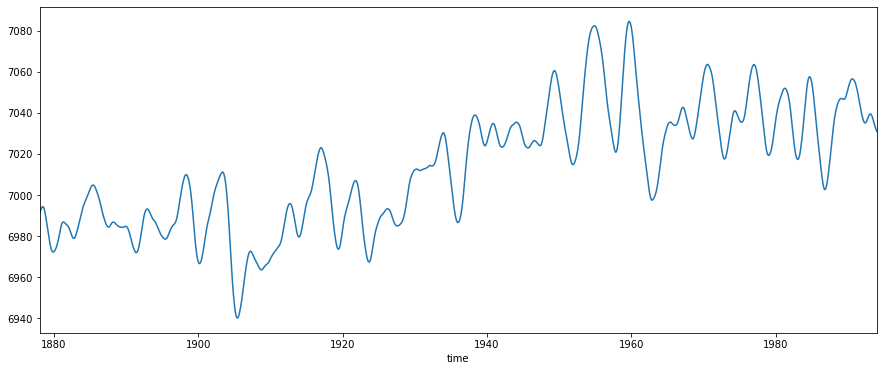

In [14]:
from statsmodels.tsa.filters.hp_filter import hpfilter

df = pd.read_excel('Sea level data/Mumbai_India.xlsx',
                   index_col=0,
                   parse_dates=True)

sea_level_cycle, sea_level_trend = hpfilter(df['sea_level'], lamb=1600)

sea_level_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

# De-trending the time series using differencing

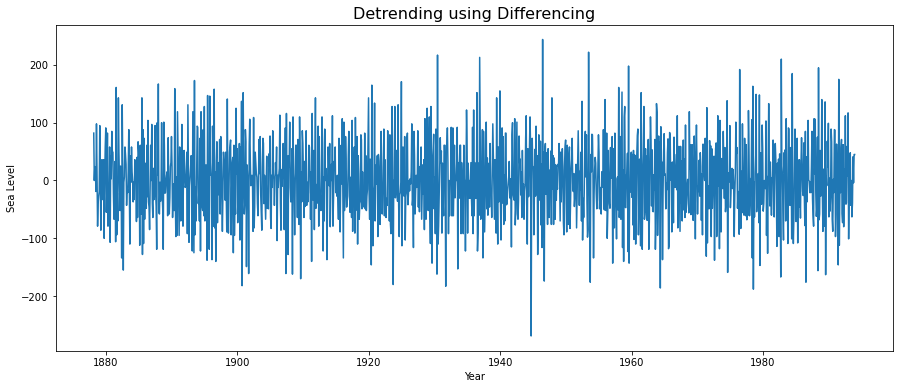

In [15]:
diff = df.sea_level.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)

plt.title('Detrending using Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Sea Level')

plt.show()

# Autocorrelation plot for seasonality

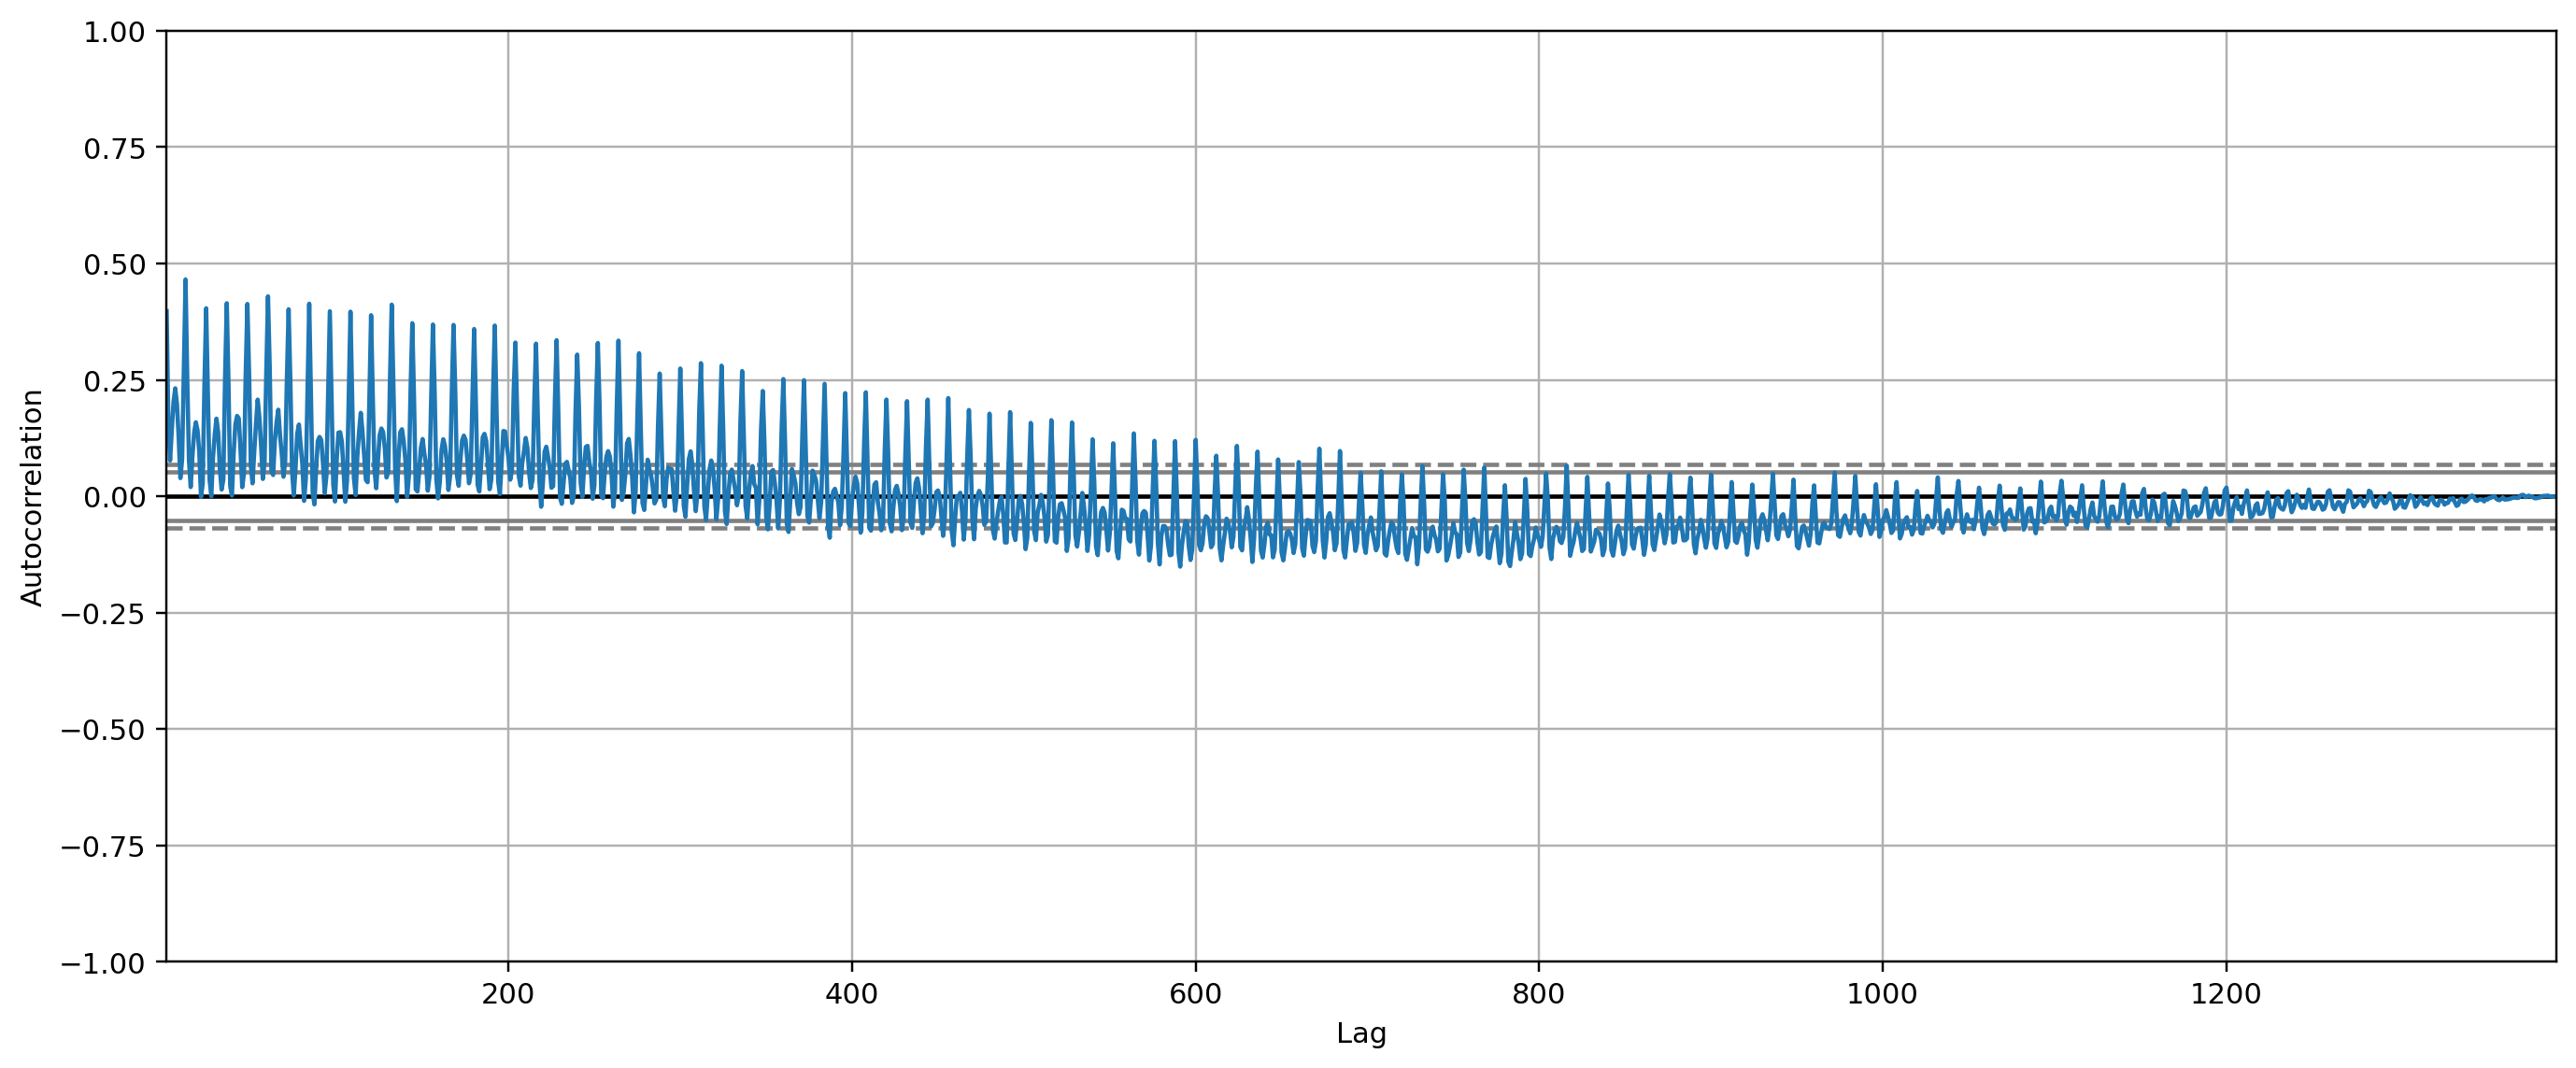

In [16]:
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':220})

autocorrelation_plot(df.sea_level.tolist())

In [62]:
# Create a function for checking the stationarity in the time series

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 96, center = False).mean()  # 96 months = 8 years
    rolstd = TS.rolling(window = 96, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(15,8))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean', fontsize=20) #& Standard Deviation
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Mean Sea Level', fontsize=16)
    plt.tick_params(labelsize=12);
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

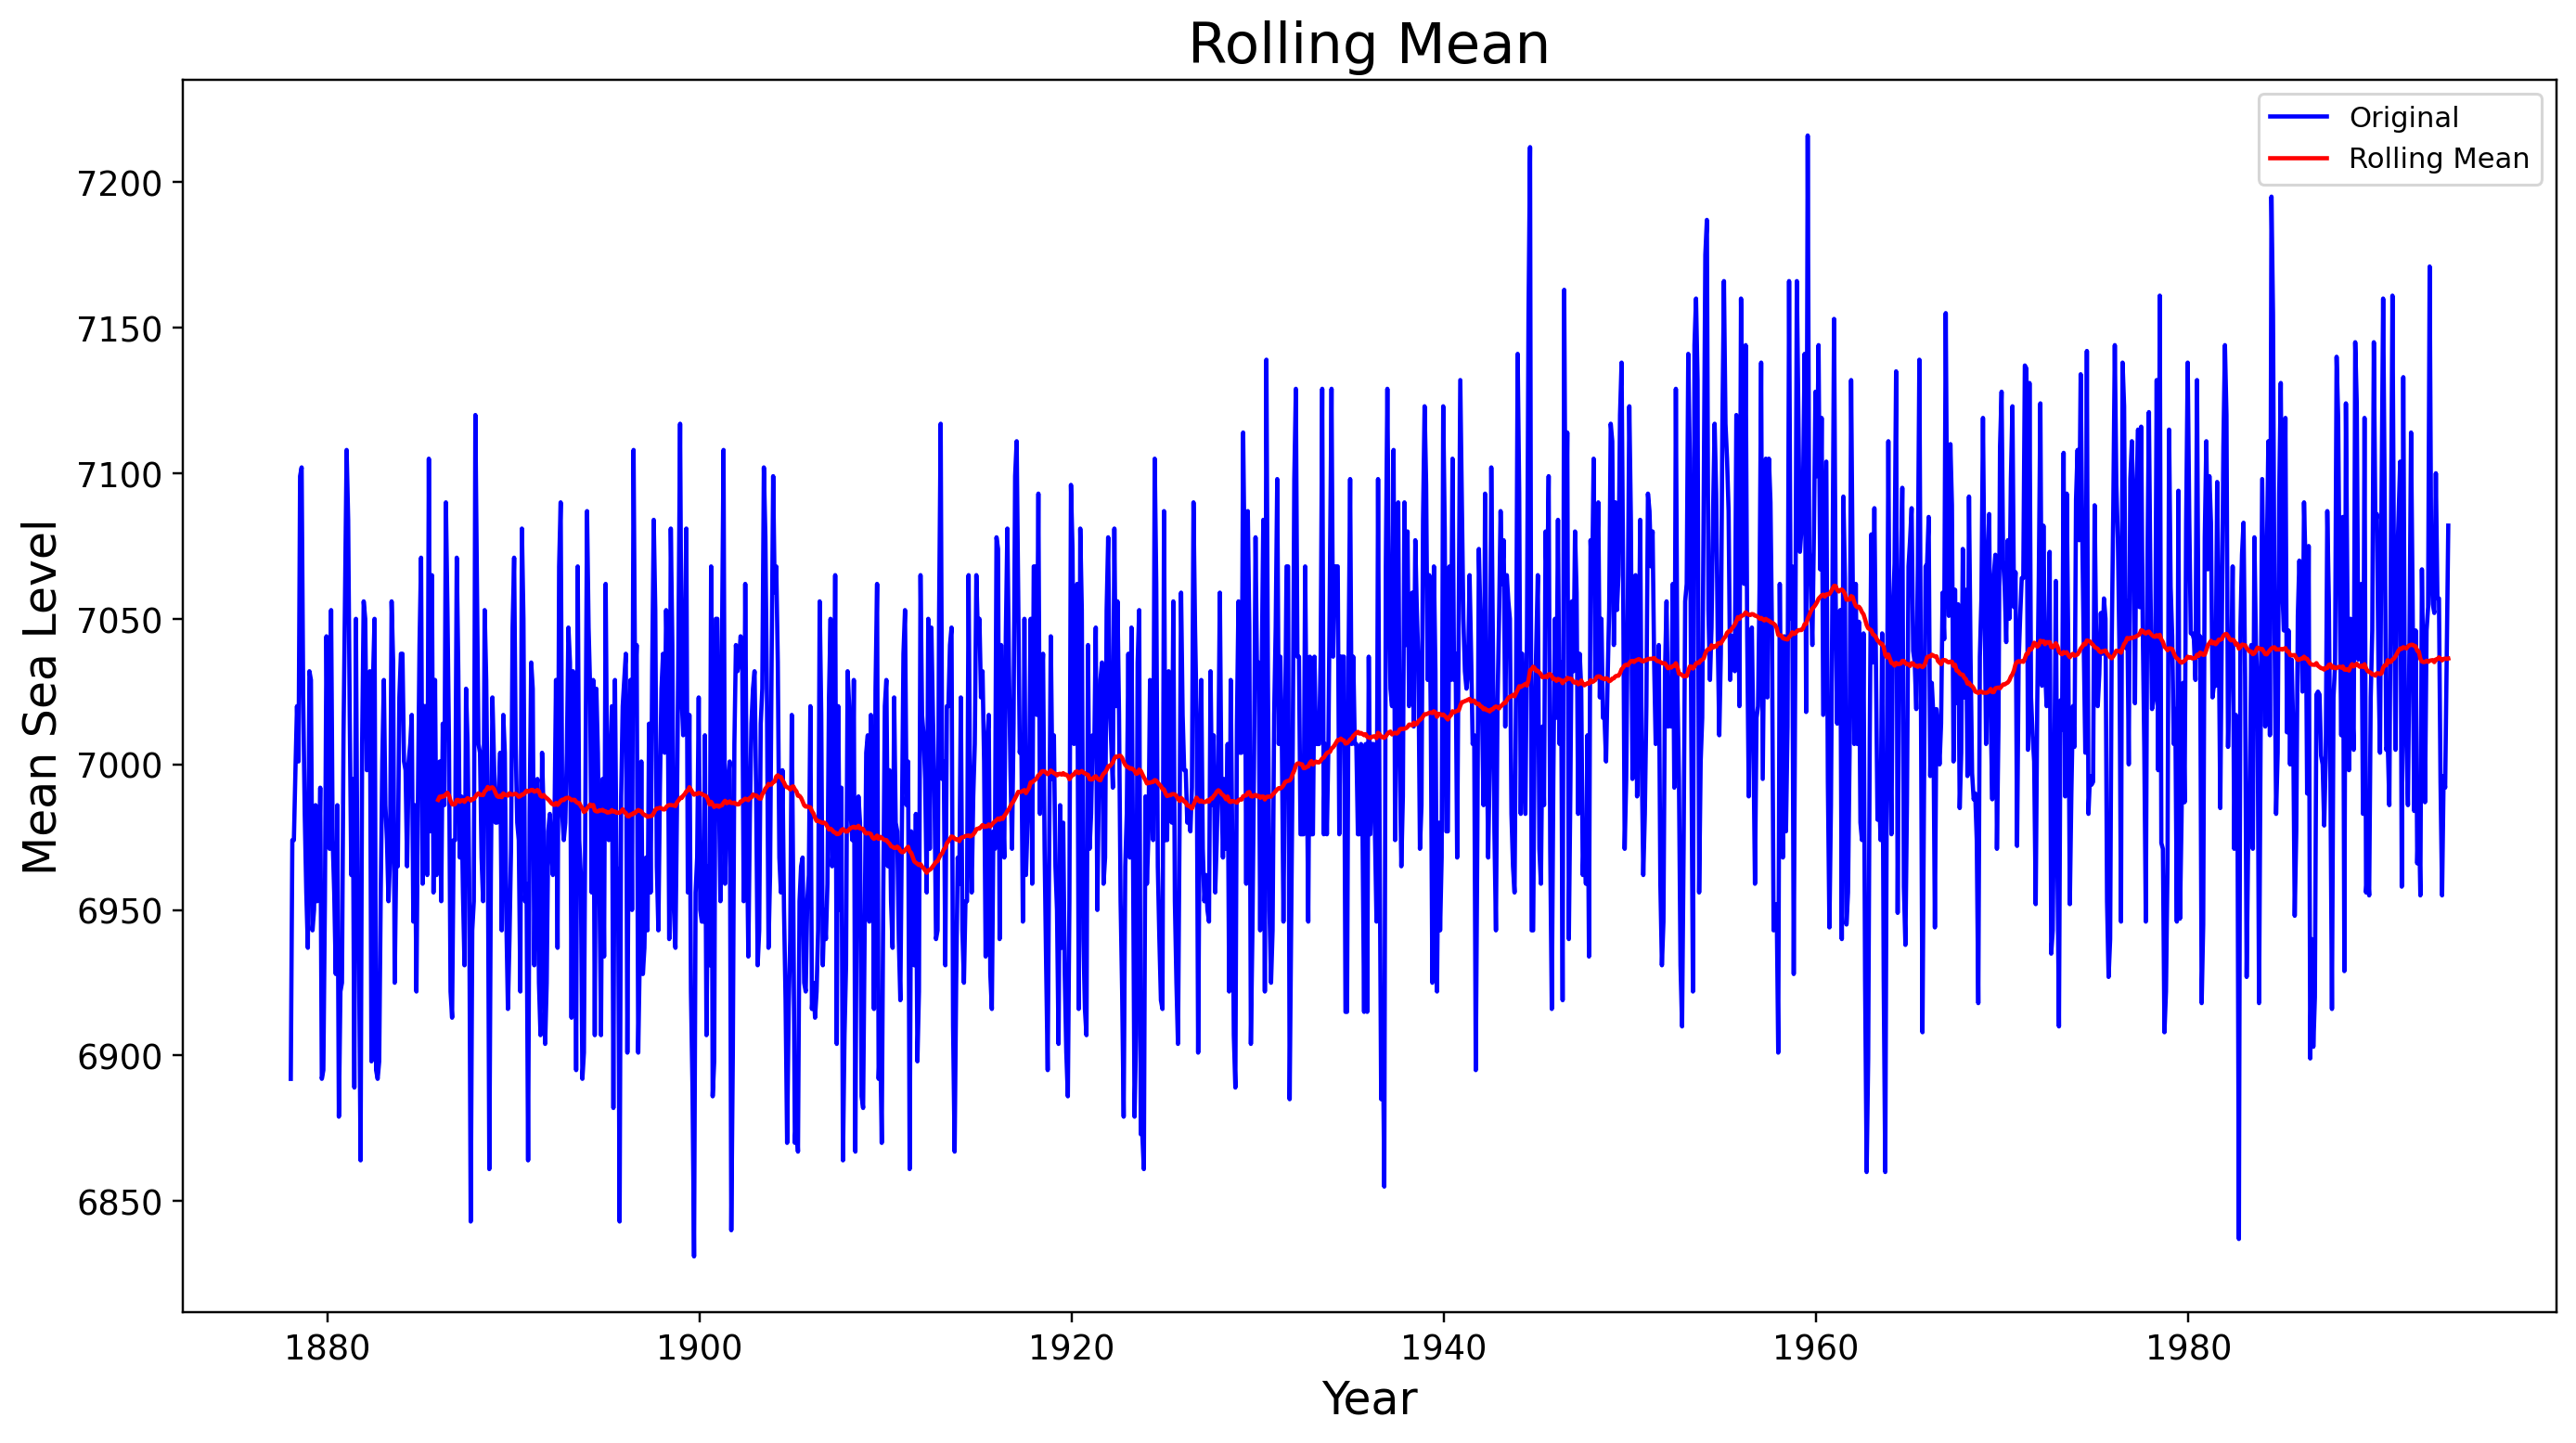

Results of Dickey-Fuller Test:
Test Statistic                   -3.608036
p-value                           0.005609
#Lags Used                       23.000000
Number of Observations Used    1368.000000
Critical Value (1%)              -3.435139
Critical Value (5%)              -2.863655
Critical Value (10%)             -2.567896
dtype: float64


In [63]:
# Stationarity check

stationarity_check(df['sea_level'])

# Detecting cyclical variation

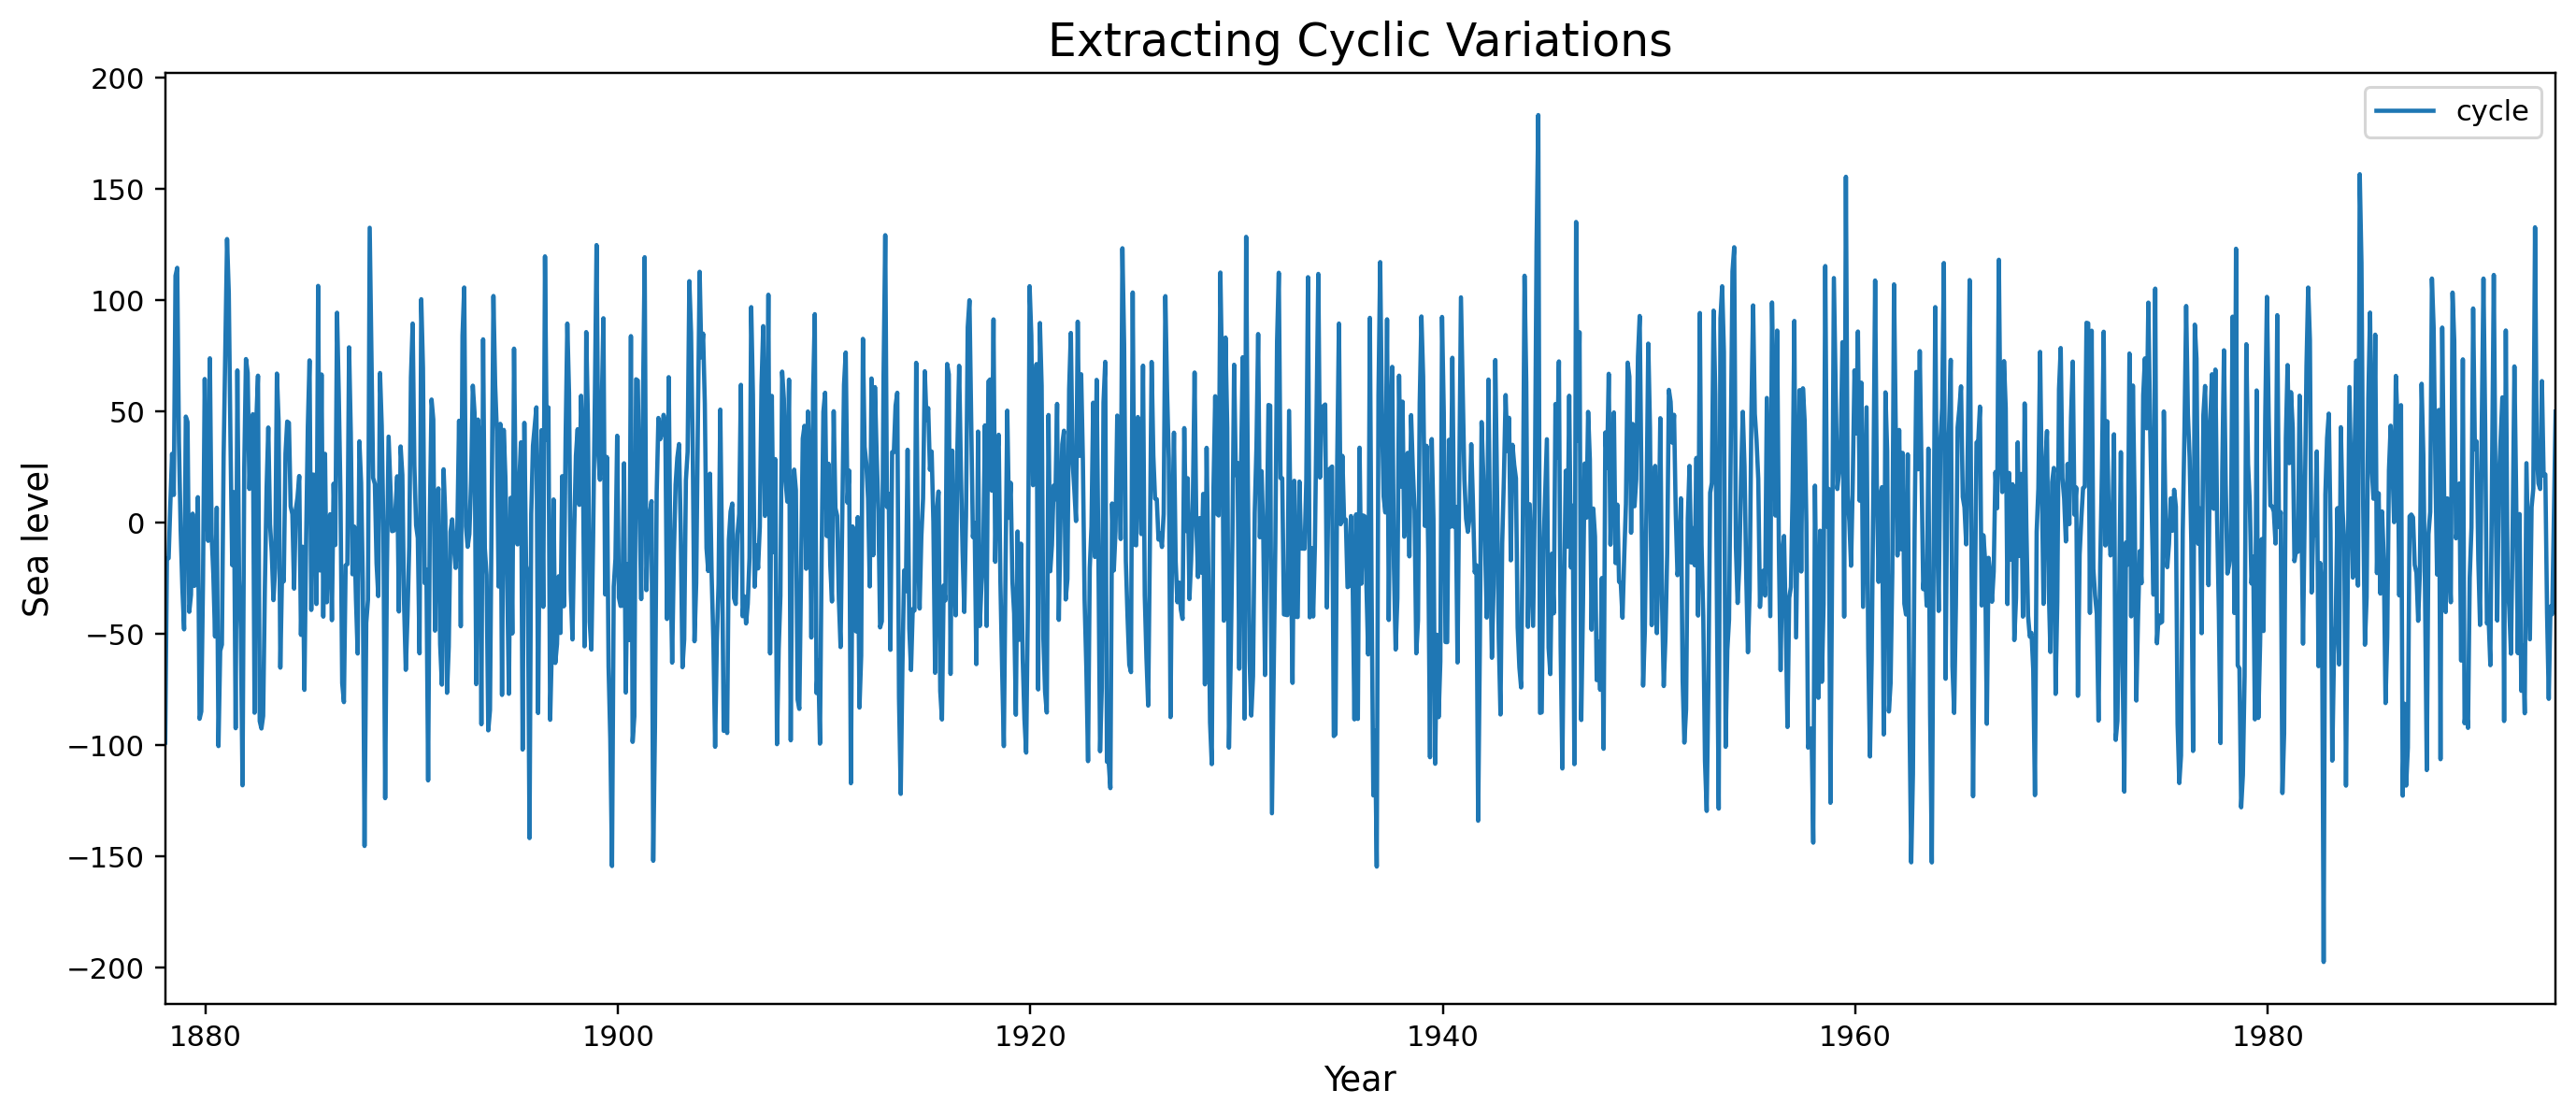

In [27]:
sea_level_cycle, sea_level_trend = hpfilter(df['sea_level'], lamb=1600*3*4) # lambda = 1600*4*3 for monthly data

df['cycle'] = sea_level_cycle
df['trend'] = sea_level_trend

df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sea level', fontsize=12)
plt.show()

# Deseasoning the time series

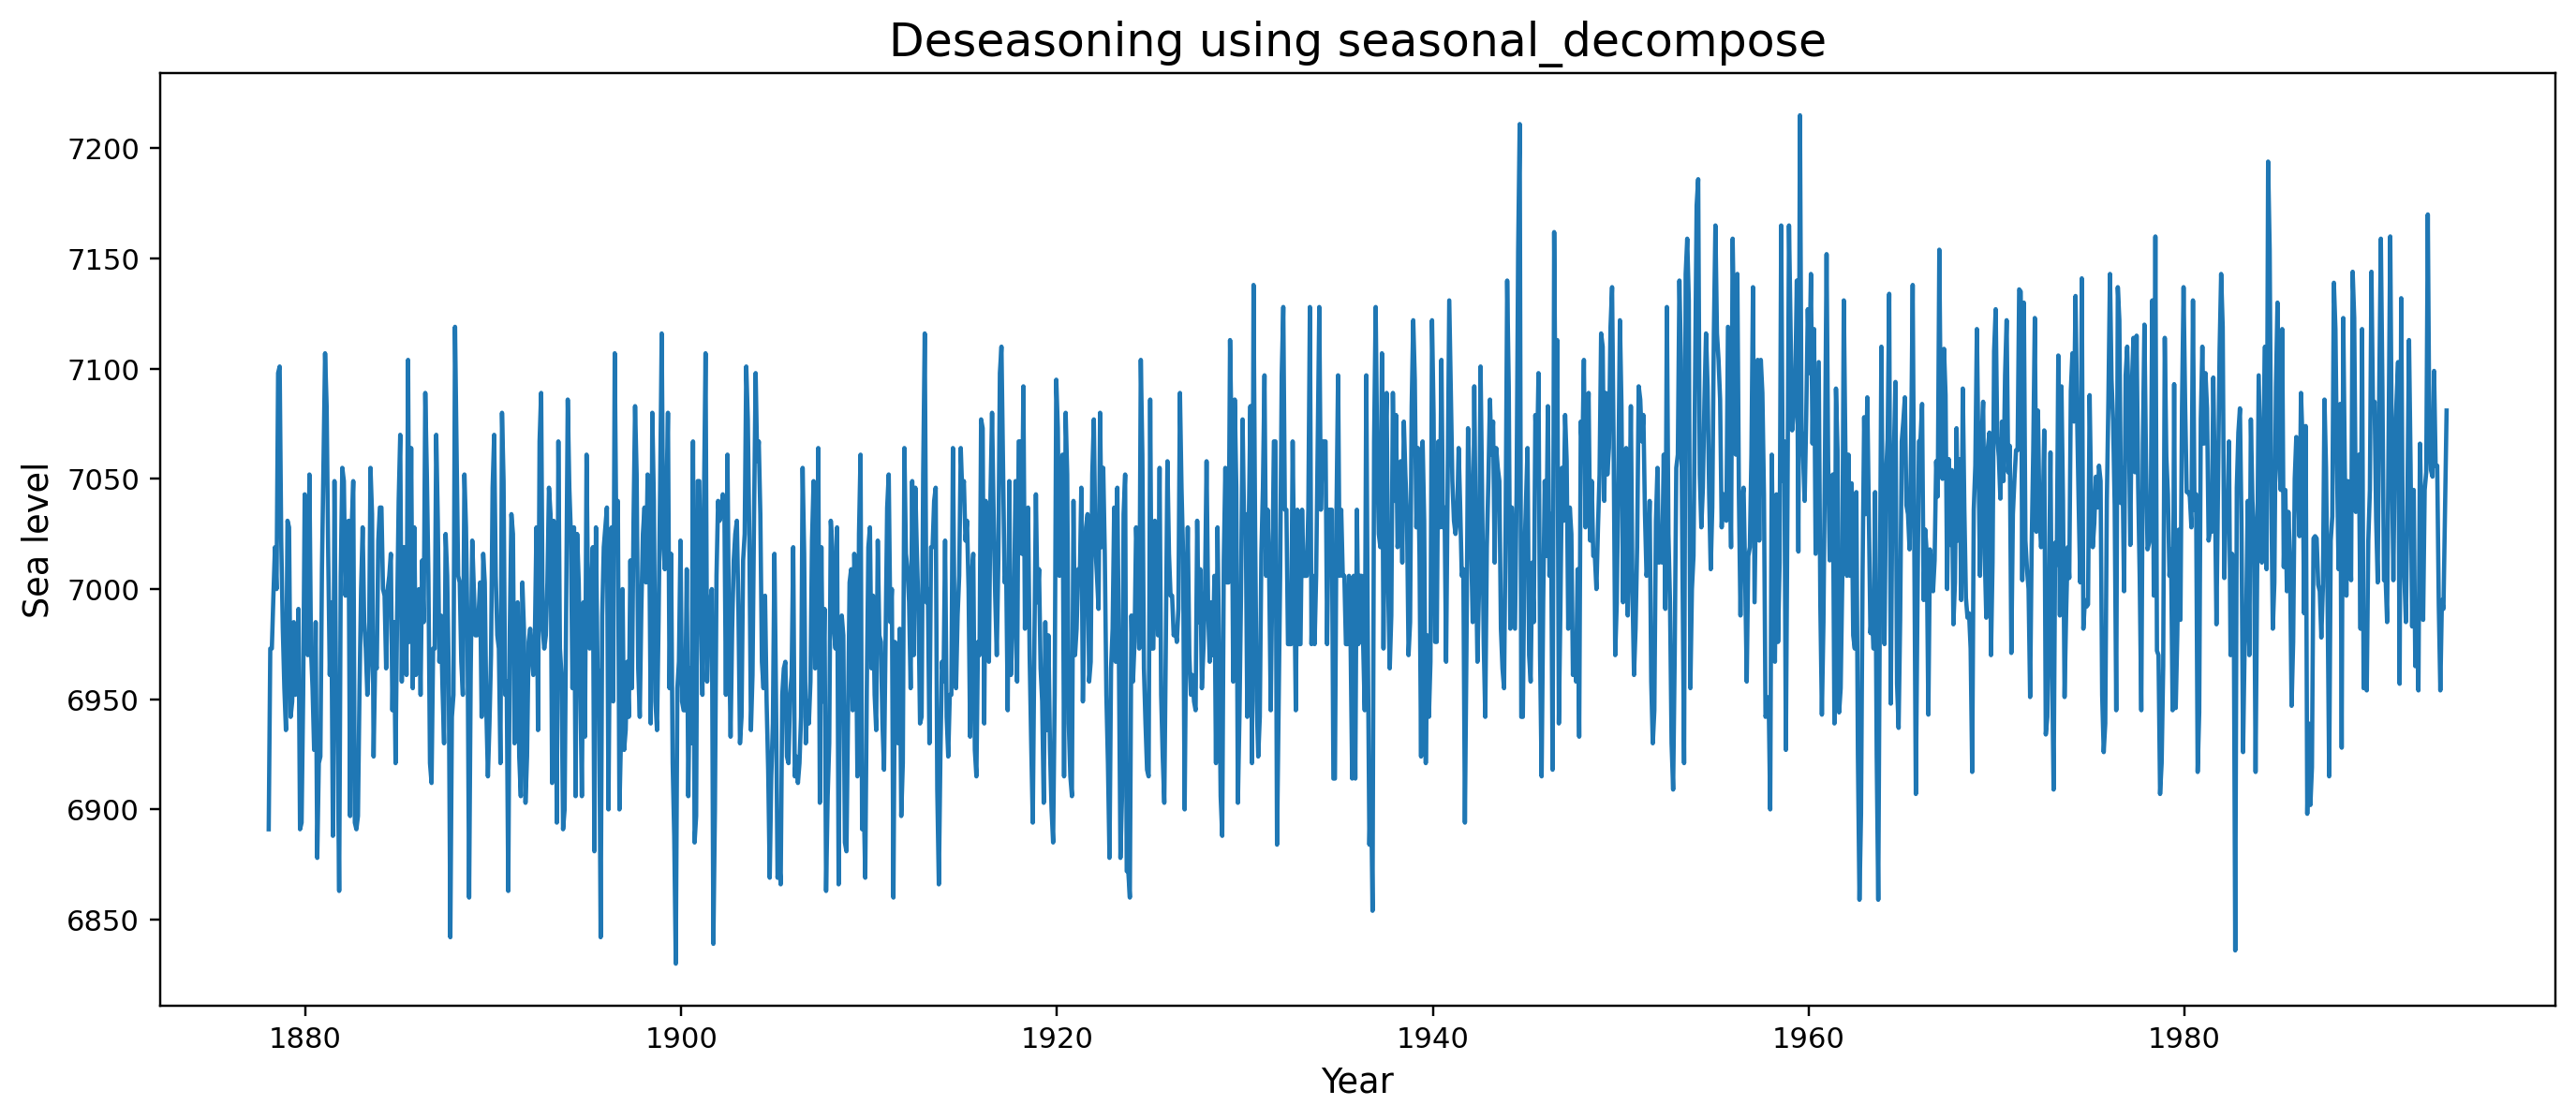

In [26]:
import warnings
warnings.filterwarnings("ignore")

result_mul = seasonal_decompose(df['sea_level'], model='multiplicative', extrapolate_trend='freq', period=365)
deseason = df['sea_level'] - result_mul.seasonal

plt.figure(figsize=(15,6))
plt.plot(deseason)

plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sea level', fontsize=12)
plt.show()

# Decompose the time series

Text(0.5, 0, 'Time')

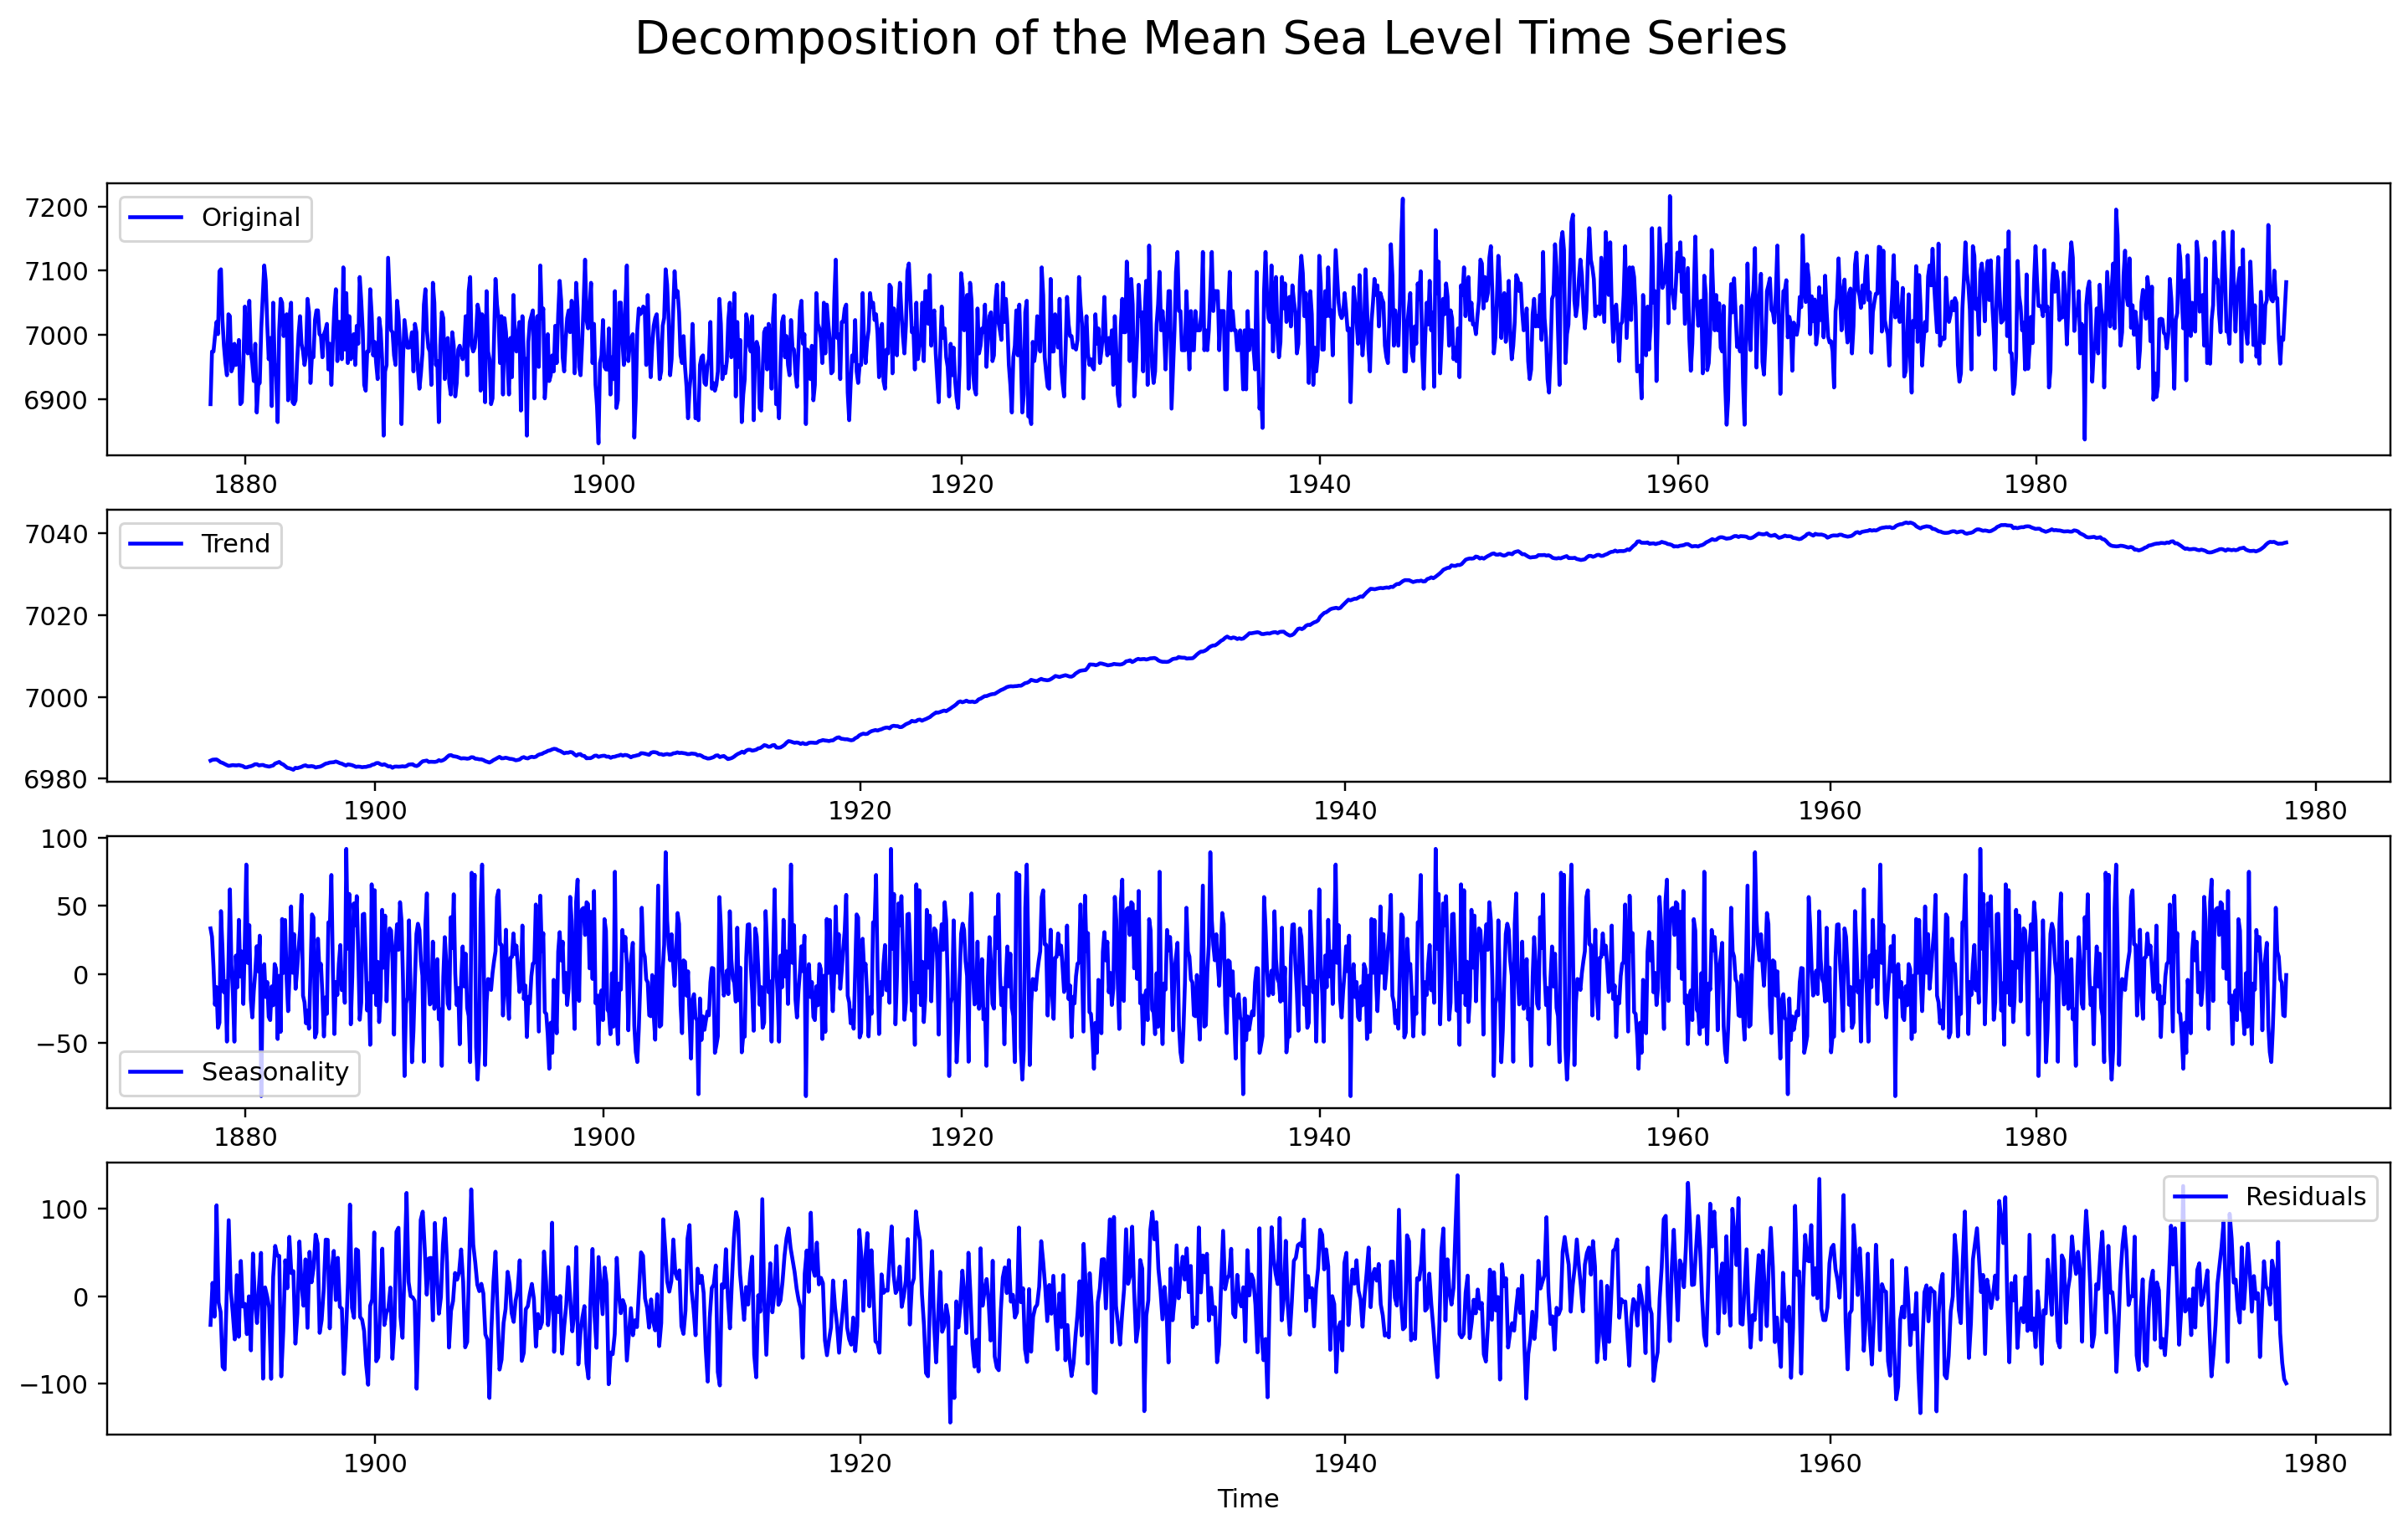

In [49]:
result = seasonal_decompose(df['sea_level'], model='additive', period=365) 

trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot gathered statistics
plt.rcParams['figure.figsize'] = (16, 9)
#plt.figure(figsize=(12,8))

plt.suptitle("Decomposition of the Mean Sea Level Time Series", fontsize=18)

 

plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')

plt.xlabel("Time")

#plt.tight_layout()


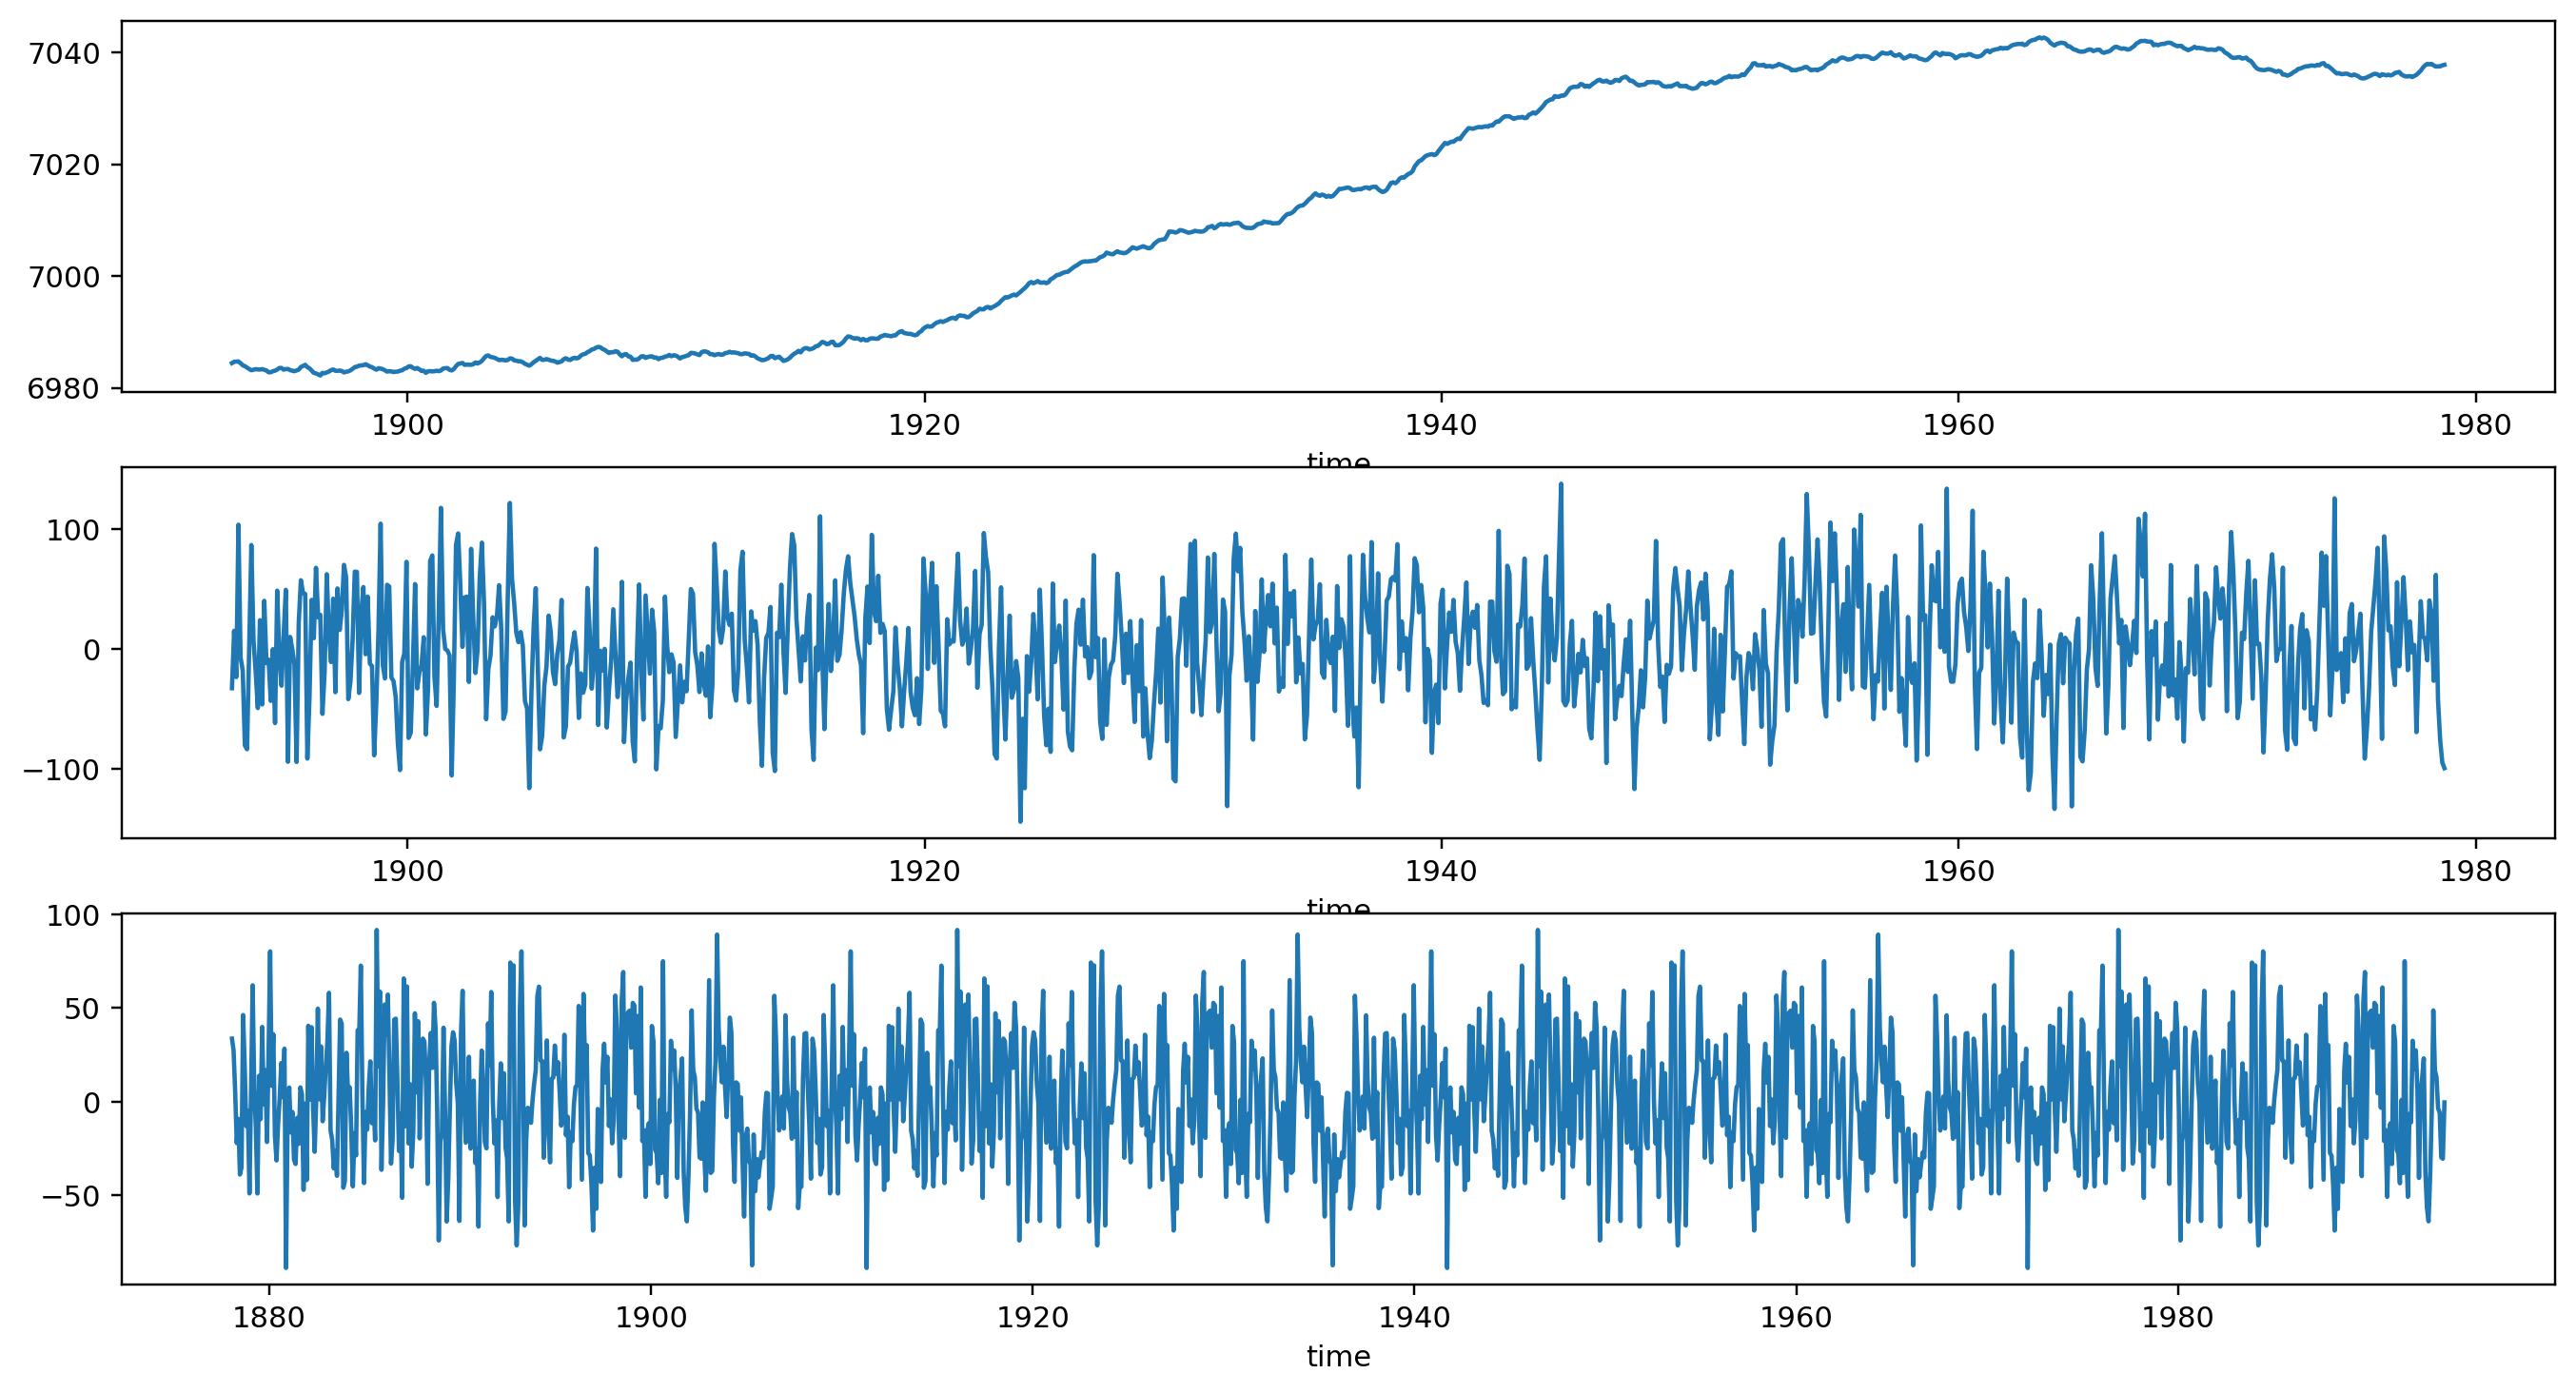

In [29]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))

result.trend.plot(ax=ax1)

result.resid.plot(ax=ax2)

result.seasonal.plot(ax=ax3)

# Stationarity check

In [17]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 96, center = False).mean()  # 96 months = 8 years
    rolstd = TS.rolling(window = 96, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS) # change the passengers column as required 
    
    #Plot rolling statistics:
    #fig = plt.figure(figsize=(12,6))
    #orig = plt.plot(TS, color='blue',label='Original')
    #mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    #plt.legend(loc='best')
    #plt.title('Rolling Mean & Standard Deviation')
    #plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

# Code here
#stationarity_check(ts)

In [43]:
residual.dropna(inplace=True)

stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                -5.931604e+00
p-value                        2.373405e-07
#Lags Used                     2.200000e+01
Number of Observations Used    1.005000e+03
Critical Value (1%)           -3.436873e+00
Critical Value (5%)           -2.864420e+00
Critical Value (10%)          -2.568304e+00
dtype: float64
